# Student Employability

##### Questions we would like to answer using this dataset
1. Is continuos improvement in a student's academic performance important for placement?
2. What role does Communication skill play in placement?
3. Which stream students are more likely to be coming from?
4. How about a student's performance in a competitive entrance test?
5. Does prior work experience has any bearing on campus placement outcome?

### 1. Loading Data

In [46]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
students = pd.read_csv('student.csv')

### 2. Exploratroy Data Analysis (Univariate)

Let us explore each variable individually to find out more about their data distribution.

First, we would analyze categorical variables

In [3]:
# variables with char datatype (categorical columns)
students.dtypes[students.dtypes=='object'].index.tolist()

['Gender',
 'Board_SSC',
 'Board_HSC',
 'Stream_HSC',
 'Course_Degree',
 'Entrance_Test',
 'Specialization_MBA']

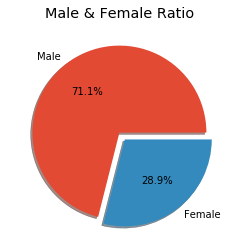

In [4]:
# Distribution of gender variable
gender_count = students.Gender.value_counts(normalize=True)
labels = ["Male", "Female"]
explode = (0, 0.1)
plt.style.use('ggplot')
plt.pie(gender_count.values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title("Male & Female Ratio")
plt.show()

This dataset contains roughly 71% to 29% male to female ratio.

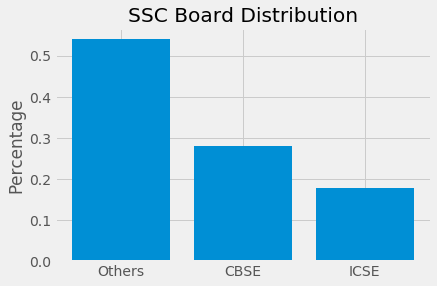

In [5]:
board_ssc = students['Board_SSC'].value_counts(normalize=True)
plt.style.use('fivethirtyeight')  # use plt.style.available to get a list of available styles
plt.bar(board_ssc.index, board_ssc.values)
plt.title("SSC Board Distribution")
plt.ylabel("Percentage")
plt.show()

As we can see from the data, more than 50% of the candidates completed their SSC from State Boards and rest are from CBSE/ICSE Board. The same holds true for HSC as well.

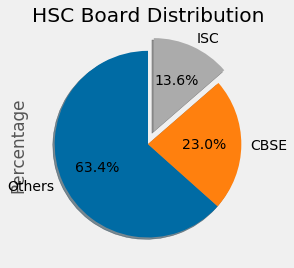

In [6]:
plt.style.use('tableau-colorblind10')
board_hsc = students['Board_HSC'].value_counts(normalize=True)
labels = board_hsc.index
explode = (0, 0, 0.15)
plt.pie(board_hsc.values, labels=labels, shadow=True, autopct='%1.1f%%', explode=explode, startangle=90)
plt.title("HSC Board Distribution")
plt.ylabel("Percentage")
plt.show()

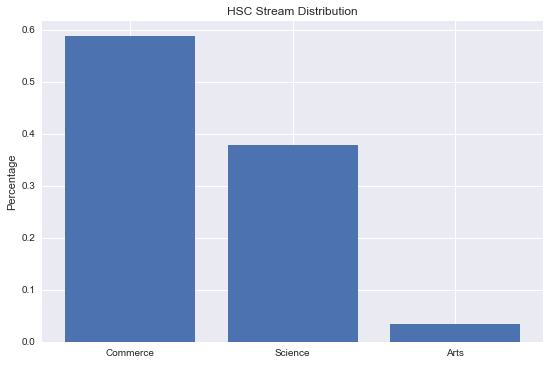

In [7]:
stream_hsc = students['Stream_HSC'].value_counts(normalize=True) 
plt.style.use('seaborn')
plt.bar(stream_hsc.index, stream_hsc.values)
plt.title("HSC Stream Distribution")
plt.ylabel("Percentage")
plt.show()

Very few candidates are from Arts stream. This data indicates candidates from Commerce & Science are more inclined towards Management programs.

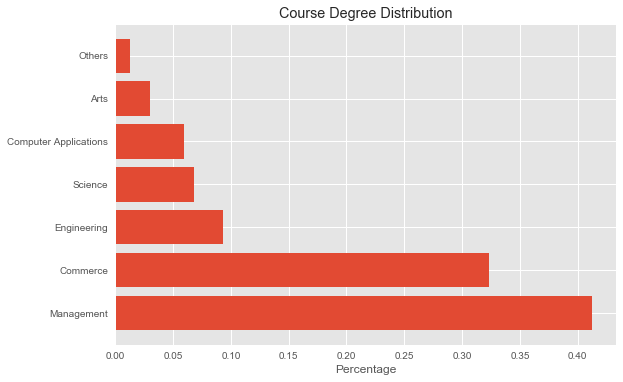

In [8]:
course_degree = students['Course_Degree'].value_counts(normalize=True)
plt.style.use('ggplot')
plt.barh(course_degree.index, course_degree.values)
plt.title("Course Degree Distribution")
plt.xlabel("Percentage")
plt.show()

Candidates with degrees in Commerce & Management seek Management programs as their obvious choice for further studies. Candidates from Arts are less than 5%.

In [9]:
students['Entrance_Test'].value_counts(normalize=True, dropna=False) # entrance_test has NA. see above

MAT      0.672340
NaN      0.187234
CAT      0.059574
K-MAT    0.059574
PGCET    0.008511
G-MAT    0.004255
GCET     0.004255
XAT      0.004255
Name: Entrance_Test, dtype: float64

Since NAs consists of approx 18% of overall, let me fill them with a new category called 'Not Available'.

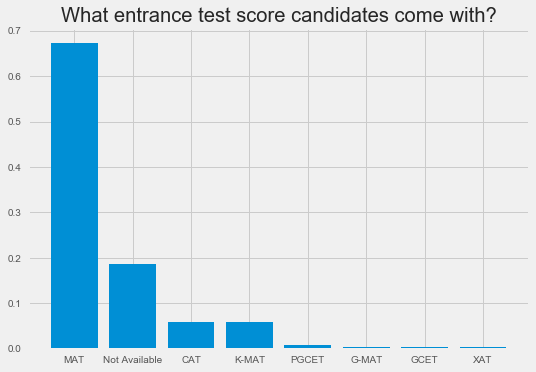

In [10]:
students['Entrance_Test'].fillna('Not Available', inplace=True)
entrance_test = students['Entrance_Test'].value_counts(normalize=True)
plt.style.use('fivethirtyeight')
plt.bar(entrance_test.index, entrance_test.values)
plt.title("What entrance test score candidates come with?")
plt.show()

As we can see, about 18% candidates do not have any entrance test information. Are they from Management Quota?

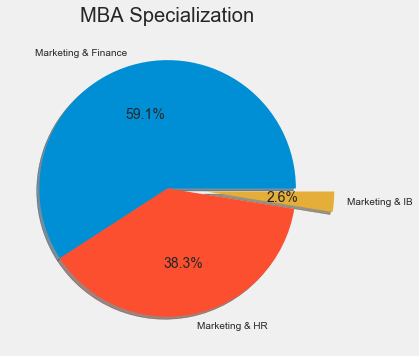

In [11]:
spec_mba = students['Specialization_MBA'].value_counts()
plt.style.use('fivethirtyeight')
labels=spec_mba.index
explode=(0,0,0.3)
plt.pie(spec_mba.values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title("MBA Specialization")
plt.show()

Seems very few candidates are inclined towards Marketing & International Business.

This completes our univariate analysis for categorical columns.
Let us move on to numerical variables for analysis.

In [12]:
# variables with integer or float datatype (numerical columns)
students.dtypes[(students.dtypes=='int64')|(students.dtypes=='float64')].index.tolist()

['ID',
 'Gender-B',
 'Percent_SSC',
 'Board_CBSE',
 'Board_ICSE',
 'Percent_HSC',
 'Percent_Degree',
 'Degree_Engg',
 'Experience_Yrs',
 'S-TEST',
 'Percentile_ET',
 'Percent_MBA',
 'S-TEST_SCORE',
 'Marks_Communication',
 'Marks_Projectwork',
 'Marks_BOCA',
 'Placement',
 'Salary']

Here, Gender-B is redundant and it just has same labels encoded with binary. We have already analyzed it in categorical variables. Similarly, 

In [13]:
# A quick look at numerical cols except ID, Gender-B
col_list = students.dtypes[(students.dtypes=='int64')|(students.dtypes=='float64')].index.tolist()[2:]
students[col_list].head()

,Percent_SSC,Board_CBSE,Board_ICSE,Percent_HSC,Percent_Degree,Degree_Engg,Experience_Yrs,S-TEST,Percentile_ET,Percent_MBA,S-TEST_SCORE,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,68.40,0,1,85.6,72.0,0,1,1,70.00,63.26,70.00,75,72,57,1,280000
1,59.00,1,0,62.0,50.0,0,0,1,79.00,56.51,79.00,58,61,50,1,400000
2,65.92,0,0,86.0,72.0,0,1,1,66.00,66.22,66.00,80,63,55,1,350000
3,56.00,0,1,78.0,62.4,0,0,1,50.89,62.21,50.89,57,70,60,1,278000
4,62.60,0,0,50.6,52.0,0,0,1,34.53,58.63,34.53,62,57,56,1,162000


A quick look reveals that variables like Board_CBSE, Board_ICSE, Degree_Engg, S-Test, etc may be encoded versions of other categorical columns. Let us confirm before dropping them from further analysis.

In [14]:
cbse = students.loc[students['Board_SSC']=='CBSE','Board_SSC'].all()
icse = students.loc[students['Board_SSC']=='ICSE','Board_SSC'].all()
others = students.loc[students['Board_SSC']=='Others','Board_SSC'].all()
if ((cbse == 'CBSE') & (icse == 'ICSE') & (others == 'Others') ):
    print("Board_CBSE, Board_ICSE are one-hot encoded versions of Board_SSC")

Board_CBSE, Board_ICSE are one-hot encoded versions of Board_SSC


Similar analysis could be done to confirm that Degree_Engg is encoded version of 'Engineering' label of Course_Degree variable, S-Test is encoded version of Entrance_Test with 1 if any entrance test entry and 0 if not. Therefore, we can drop these columns from our further analysis. Moreover, Percentile_ET & S-Test_SCORE are exactly same. So we will retain only one of them.

In [15]:
students.dtypes[(students.dtypes=='int64')|(students.dtypes=='float64')].index[[2,5,6,8,10,11,13,14,15,16,17]]

Index(['Percent_SSC', 'Percent_HSC', 'Percent_Degree', 'Experience_Yrs',
       'Percentile_ET', 'Percent_MBA', 'Marks_Communication',
       'Marks_Projectwork', 'Marks_BOCA', 'Placement', 'Salary'],
      dtype='object')

In [ ]:
# Percent_SSC
students[['Percent_SSC']].describe()

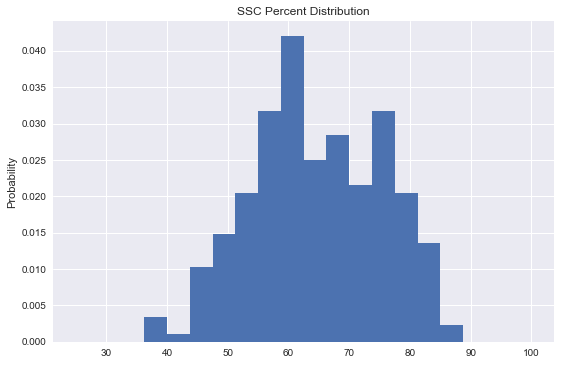

In [16]:
plt.style.use('seaborn')
plt.hist(students['Percent_SSC'], bins=20, density=True, log=False, range=(25, 100))
plt.title("SSC Percent Distribution")
plt.ylabel("Probability")
plt.show()

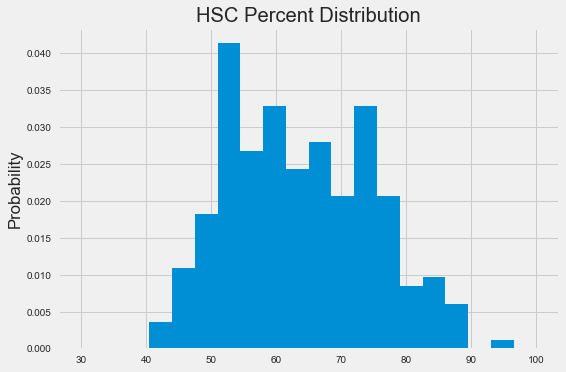

In [17]:
plt.style.use('fivethirtyeight')
plt.hist(students['Percent_HSC'], bins=20, density=True, log=False, range=(30, 100))
plt.title("HSC Percent Distribution")
plt.ylabel("Probability")
plt.show()

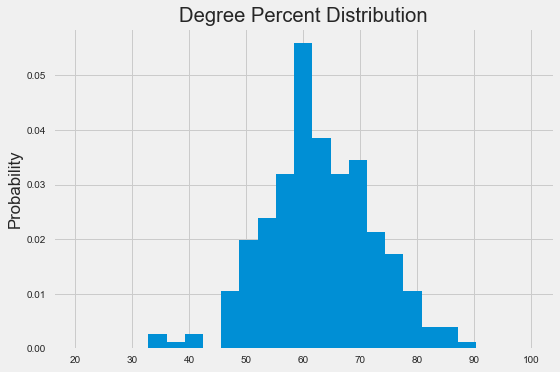

In [18]:
plt.style.use('fivethirtyeight')
plt.hist(students['Percent_Degree'], bins=25, density=True, log=False, range=(20, 100))
plt.title("Degree Percent Distribution")
plt.ylabel("Probability")
plt.show()

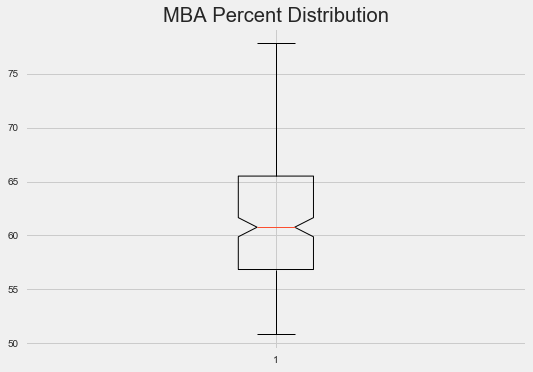

In [19]:
fig, ax = plt.subplots()
plt.boxplot(students['Percent_MBA'], notch=True, vert=True, showfliers=True)
plt.title("MBA Percent Distribution")
plt.show()

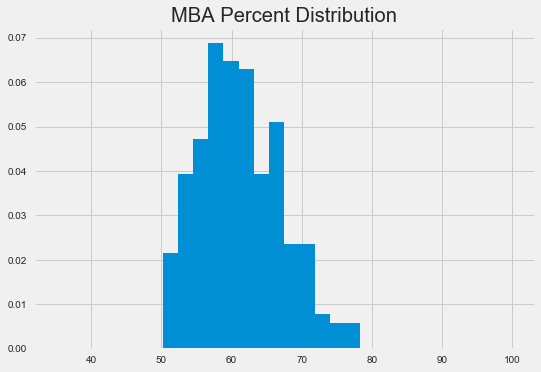

In [20]:
plt.hist(students['Percent_MBA'], bins=30, density=True, range=(35,100))
plt.title("MBA Percent Distribution")
plt.show()

Everybody in our dataset scored more than 50% in their MBA exams. Could this be due to placement cut-off set by differenet hiring companies?

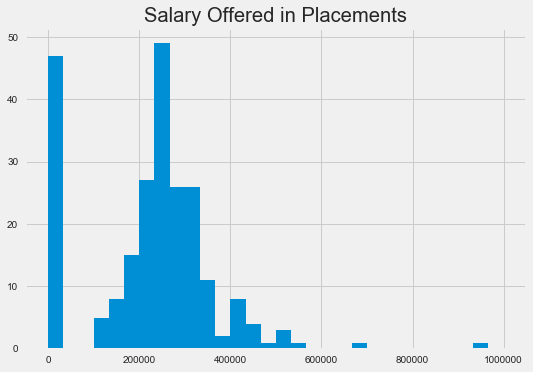

In [21]:
plt.hist(students['Salary'], bins=30, density=False, log=False, range=(-5, 1000000))
plt.title("Salary Offered in Placements")
plt.show()

There are some candidates not placed during campus placement and their Salary is zero. There are exceptional candidates with a very good package as well. Let us look at boxplot as well to see if there are any outliers.

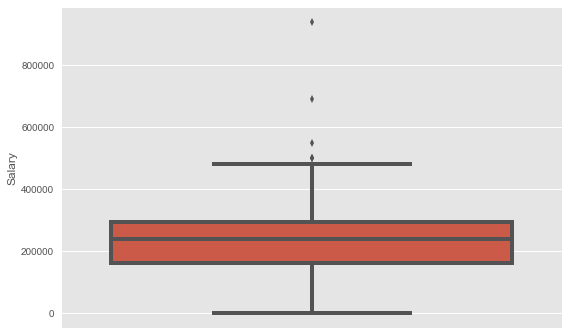

In [46]:
# plt.boxplot(students['Salary'], showfliers=True)
# plt.show()
plt.style.use('ggplot')
sns.boxplot(y='Salary', data=students)
plt.show()

There are a few candidates with very high salaries offered to them.

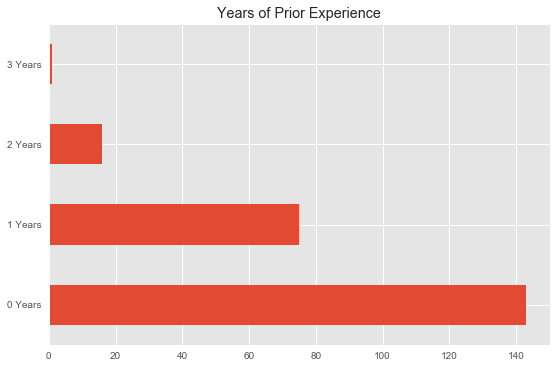

In [23]:
plt.style.use('ggplot')
students['Experience_Yrs'].value_counts().plot.barh()
ylabels = [str(num) + ' Years' for num in students['Experience_Yrs'].unique()]
plt.title("Years of Prior Experience")
#plt.ylabel("# of Years of Experience")
plt.yticks(students['Experience_Yrs'].unique(), ylabels)
plt.show()

It seems most of the candidates opt for higher MBA programs right after their UnderGrad degrees, very few candidates are with 3 years of experience.

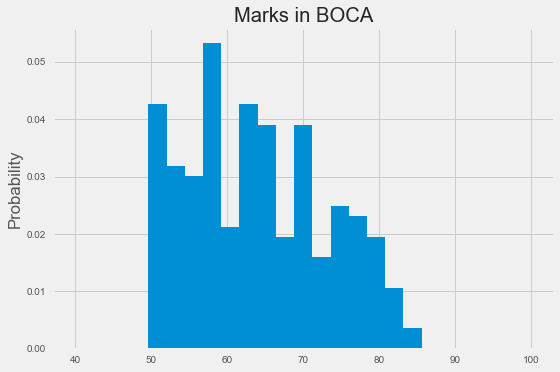

In [24]:
plt.style.use('fivethirtyeight')
plt.hist(students['Marks_BOCA'], bins=25, density=True, range=(40, 100))
plt.title("Marks in BOCA")
plt.ylabel("Probability")
plt.show()

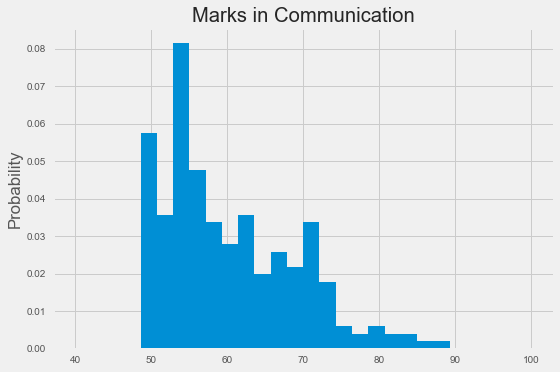

In [25]:
plt.style.use('fivethirtyeight')
plt.hist(students['Marks_Communication'], bins=28, density=True, range=(40, 100))
plt.title("Marks in Communication")
plt.ylabel("Probability")
plt.show()

Marks in communication has right skewed distribution. There are a few candidates who have scored very high marks.

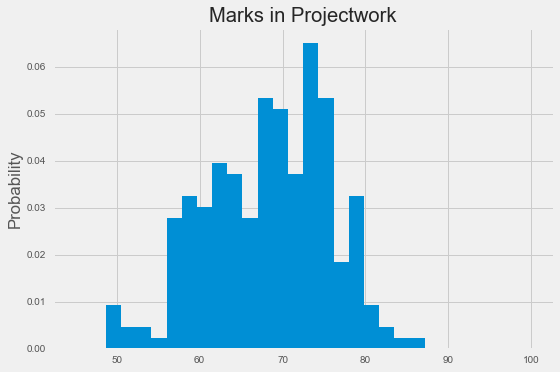

In [26]:
plt.style.use('fivethirtyeight')
plt.hist(students['Marks_Projectwork'], bins=30, density=True, range=(45, 100))
plt.title("Marks in Projectwork")
plt.ylabel("Probability")
plt.show()

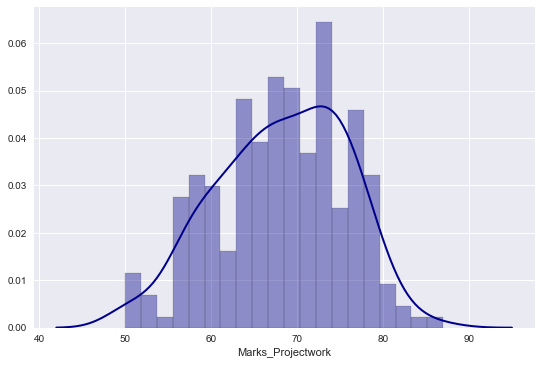

In [27]:
# projectwork marks in seaborn density graph overlaid
plt.style.use('seaborn')
sns.distplot(students['Marks_Projectwork'], hist=True, kde=True, bins=20,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.show()

### 3. Exploratroy Data Analysis (Bivariate)

Bivariate EDA could further be categorized in 1. Cat vs Cont, 2. Cat vs Cat, 3. Cont vs Cont variables

#### a) Categorical Vs Continuous

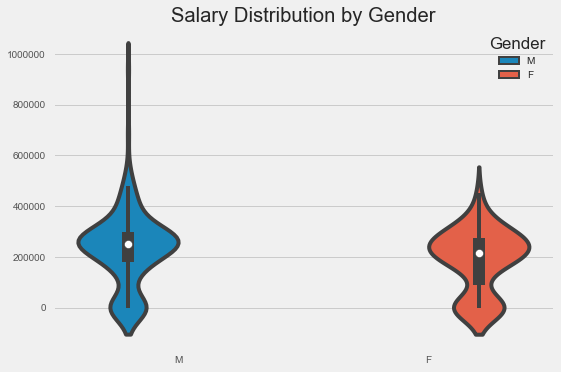

In [63]:
plt.style.use('fivethirtyeight')
sns.violinplot(x='Gender', y='Salary', data=students, hue='Gender')
plt.title("Salary Distribution by Gender")
plt.ylabel("")
plt.xlabel("")
plt.show()

Distribution for both Male & Female seems to be quite similar except few males with very high Salaries.

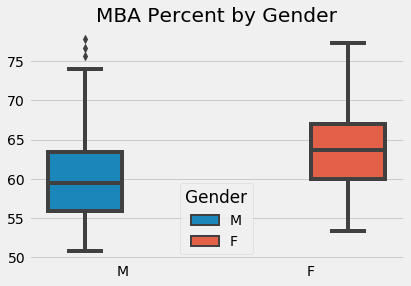

In [6]:
plt.style.use('fivethirtyeight')
#sns.violinplot(x='Gender', y='Percent_MBA', data=students, hue='Gender')
sns.boxplot(x='Gender', y='Percent_MBA', data=students, hue='Gender')
plt.title("MBA Percent by Gender")
plt.ylabel("")
plt.xlabel("")
plt.show()

Female candidates have scored better than male candidates in their MBA program. Similar analysis could also be performed with other combinations of Categorical & Continuous variables.

#### b) Categorical Vs Categorical

In [15]:
# Gender vs Placement
plt.style.use("fivethirtyeight")
pd.crosstab(students['Gender'], students['Placement'])

Placement,0,1
Gender,,
F,17,51
M,30,137


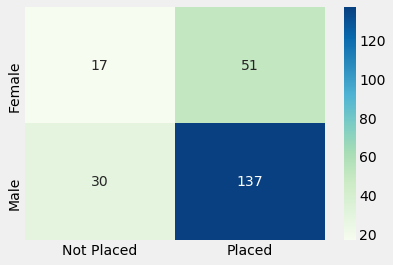

In [28]:
plt.style.use("fivethirtyeight")
sns.heatmap(pd.crosstab(students['Gender'], students['Placement']), annot=True, fmt='d', cmap='GnBu',
           yticklabels=['Female', 'Male'], xticklabels=['Not Placed', 'Placed'])
plt.ylabel("")
plt.xlabel("")
plt.show()

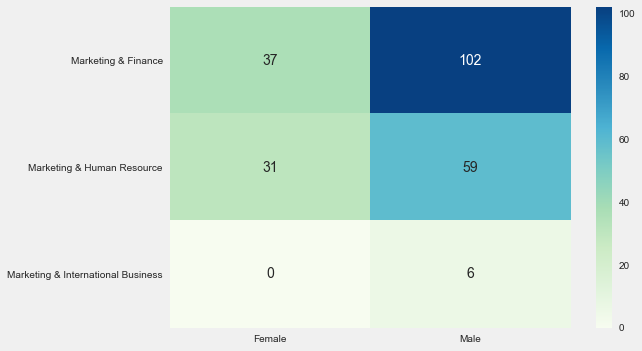

In [45]:
# Gender vs Specialization MBA
plt.style.use('fivethirtyeight')
sns.heatmap(pd.crosstab(students['Specialization_MBA'],students['Gender']), 
           annot=True, fmt='d', cmap='GnBu', #Blues
           yticklabels=['Marketing & Finance', 'Marketing & Human Resource', 'Marketing & International Business'],
           xticklabels=['Female', 'Male'])
plt.ylabel("")
plt.xlabel("")
plt.show()

None of the female candidates have opted for Marketing & IB specialization and almost 50% of females have opted for HR. Similar analysis could be performed for other categorical variables as well.

#### c) Continuous Vs Continuous

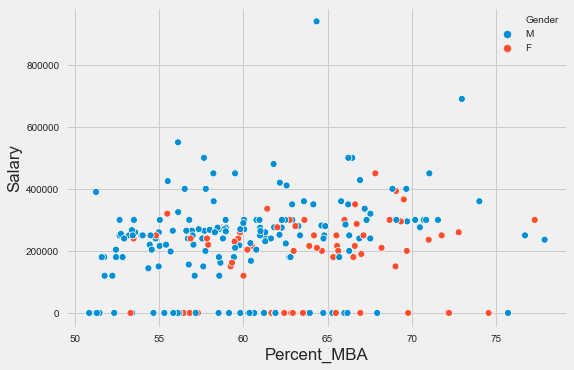

In [54]:
# above plot using seaborn
plt.style.use('fivethirtyeight')
#scaled_sal = np.log(students['Salary'])
sns.scatterplot(x='Percent_MBA', y='Salary', data=students, hue='Gender') # multivariate analysis
plt.show()

There are a few male candidates with very high Sal package. Female candidates (with score higher than 70) are offered less package than their male counterparts.

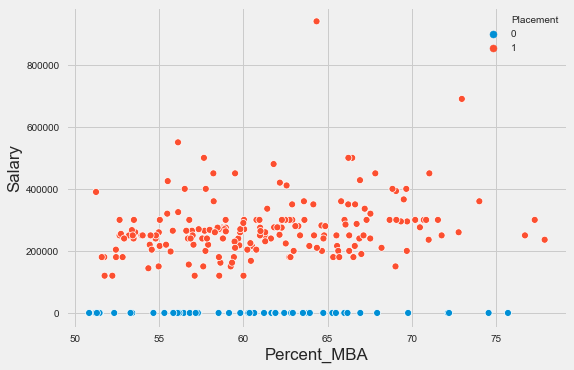

In [44]:
# above plot using seaborn
plt.style.use('fivethirtyeight')
#scaled_sal = np.log(students['Salary'])
sns.scatterplot(x='Percent_MBA', y='Salary', data=students, hue='Placement') # multivariate analysis
plt.show()

Since scale of Salary and percent is quite different. Let's scale Salary to plot and see if that would make any difference. 

In [51]:
# minmax normalization
def minmax_norm(x):
    normalized_x = np.round(((x - np.min(x))/(np.max(x) - np.min(x))) * 100, 2)
    return normalized_x
#minmax_norm(students['Salary'])

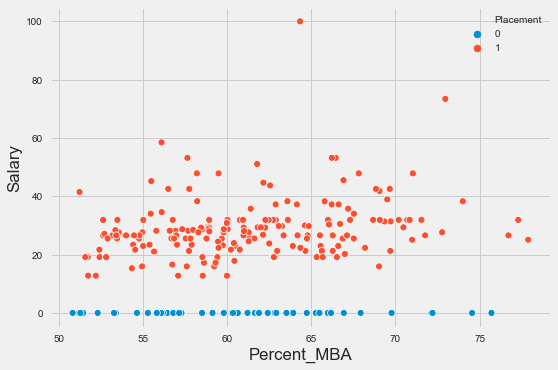

In [52]:
plt.style.use('fivethirtyeight')
scaled_sal = minmax_norm(students['Salary'])
sns.scatterplot(x='Percent_MBA', y=scaled_sal, data=students, hue='Placement') # multivariate analysis
plt.show()

The plot looks exactly same. Some candidates are not placed inspite of having good scored in their MBA programs. Did they voluntarily opt out of placements?

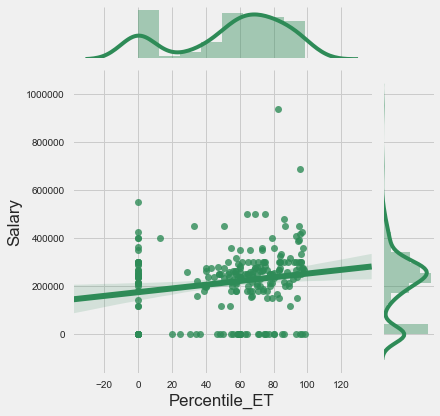

In [69]:
plt.style.use('fivethirtyeight')
sns.jointplot(x='Percentile_ET', y='Salary', data=students, kind='reg', color='seagreen')
plt.show()

Candidates with higher Entrance Test score are offered higher package probably because they perform well in their program as well.

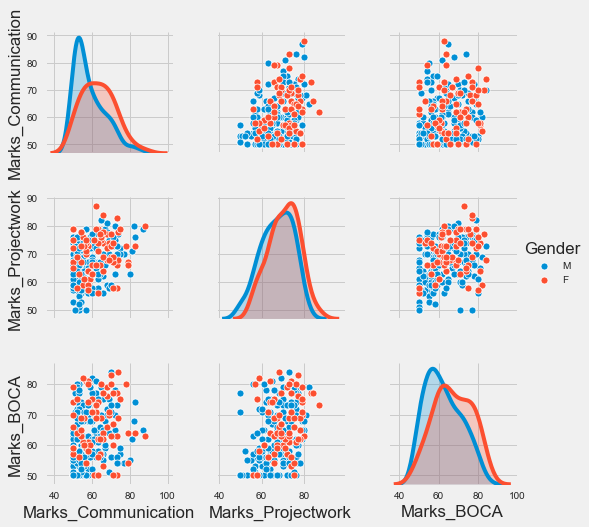

In [74]:
# pairwise corr
col_list = ['Marks_Communication', 'Marks_Projectwork', 'Marks_BOCA', 'Gender']
sns.pairplot(students[col_list], hue='Gender')
plt.show()

Female candidates have performed on par with their male counterparts in all three areas. Few male candidates have scored higher than females in Communication.